<a href="https://colab.research.google.com/github/Shrut2112/Credit_Default_Risk_Prediction/blob/main/Credit_Card_Defaultees_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/mishra5001/credit-card?select=application_data.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 
Your Kaggle username: 
Your Kaggle username: shrutu04
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mishra5001/credit-card


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer

In [ ]:
#Loading Dataset
df = pd.read_csv('/content/credit-card/application_data.csv')

In [ ]:
print(df.shape)
df.head()

(307511, 122)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
print(df.info())
print(print("Columns: ",df.columns.tolist()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
Columns:  ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY

In [ ]:
pd.options.display.max_rows = None

In [ ]:
def unique_nunique_summary(dataset):
    nunique_values = dataset.apply(lambda x: x.nunique())

    summary = pd.DataFrame({
        'Column': dataset.columns,
        'Nunique Values': nunique_values
    })

    return summary

result_summary = unique_nunique_summary(df)
print(result_summary)

                                                    Column  Nunique Values
SK_ID_CURR                                      SK_ID_CURR          307511
TARGET                                              TARGET               2
NAME_CONTRACT_TYPE                      NAME_CONTRACT_TYPE               2
CODE_GENDER                                    CODE_GENDER               3
FLAG_OWN_CAR                                  FLAG_OWN_CAR               2
FLAG_OWN_REALTY                            FLAG_OWN_REALTY               2
CNT_CHILDREN                                  CNT_CHILDREN              15
AMT_INCOME_TOTAL                          AMT_INCOME_TOTAL            2548
AMT_CREDIT                                      AMT_CREDIT            5603
AMT_ANNUITY                                    AMT_ANNUITY           13672
AMT_GOODS_PRICE                            AMT_GOODS_PRICE            1002
NAME_TYPE_SUITE                            NAME_TYPE_SUITE               7
NAME_INCOME_TYPE         

In [ ]:
print(df.isna().sum())

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [ ]:
df_null = df.isna().sum()
df_null_percentage = (df_null/len(df))*100
df_null_percentage.sort_values(ascending=False)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56.381073
NONLIVINGAREA_MODE              55.179164
NONLIVINGAREA_AVG               55.179164
NONLIVINGAREA_MEDI              55.179164
ELEVATORS_AVG                   53.295980
ELEVATORS_MEDI                  53.295980
ELEVATORS_MODE                  53.295980
WALLSMATERIAL_MODE              50.840783
APARTMENTS_AVG                  50.749729
APARTMENTS_MEDI                 50.749729
APARTMENTS_MODE                 50.749729
ENTRANCES_MODE                  50.348768
ENTRANCES_MEDI                  50.348768
ENTRANCES_AVG                   50.348768
LIVINGAREA_AVG                  50.193326
LIVINGAREA_MEDI                 50.193326
LIVINGAREA_MODE                 50.193326
HOUSETYPE_MODE                  50.176091
FLOORSMAX_MODE                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325
HOUR_APPR_PROCESS_START          0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
ORGANIZATION_TYPE                0.000000
NAME_CONTRACT_TYPE               0.000000
FLAG_OWN_CAR                     0.000000
SK_ID_CURR                       0.000000
AMT_CREDIT                       0.000000
AMT_INCOME_TOTAL                 0.000000
CNT_CHILDREN                     0.000000
NAME_INCOME_TYPE                 0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
NAME_EDUCATION_TYPE              0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
CODE_GENDER                      0.000000
TARGET                           0.000000
FLAG_OWN_REALTY                  0.000000
FLAG_EMAIL                       0.000000
REGION_RATING_CLIENT             0.000000
REGION_RAT

FOUND THAT COLUMNS MORE THAN 32% NULL ARE NOT RELEVANT

In [ ]:
#DROPPING COLUMNS HAVING MORE THAN 32% NULL VALUES
df_app_rm = df_null/len(df)
df_clean = df.loc[:,df_app_rm <= .32]

In [ ]:
df_clean.drop('SK_ID_CURR',axis=1,inplace=True)

In [ ]:
print(df['EXT_SOURCE_2'].skew())
print(df['EXT_SOURCE_3'].skew())

-0.7935760449636996
-0.4093904596160267


In [ ]:
#CLEANING DATA

df_clean['OCCUPATION_TYPE'].fillna("Missing",inplace=True)

df_clean['EXT_SOURCE_3'].fillna(df_clean['EXT_SOURCE_3'].median(),inplace=True)
df_clean['EXT_SOURCE_2'].fillna(df_clean['EXT_SOURCE_2'].median(),inplace=True)

df_clean['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0,inplace=True)
df_clean['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0,inplace=True)
df_clean['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0,inplace=True)
df_clean['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0,inplace=True)
df_clean['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0,inplace=True)
df_clean['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0,inplace=True)

df_clean['NAME_TYPE_SUITE'].fillna("Unaccompanied",inplace=True)

df_clean['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
df_clean['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
df_clean['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)
df_clean['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0,inplace=True)

df_clean['AMT_GOODS_PRICE'].fillna(df_clean['AMT_GOODS_PRICE'].median(),inplace=True)
df_clean['AMT_ANNUITY'].fillna(df_clean['AMT_ANNUITY'].median(),inplace=True)
df_clean['CNT_FAM_MEMBERS'].fillna(df_clean['CNT_FAM_MEMBERS'].median(),inplace=True)
df_clean['DAYS_LAST_PHONE_CHANGE'].fillna(0,inplace=True)


ERROR HANDELING

In [ ]:
categorical_columns = df_clean.select_dtypes(include='object').columns.tolist()
numerical_columns = df_clean.select_dtypes(exclude='object').columns.tolist()

In [ ]:
for col in categorical_columns:
  print(col,": ",df_clean[col].unique(),"\n")

NAME_CONTRACT_TYPE :  ['Cash loans' 'Revolving loans'] 

CODE_GENDER :  ['M' 'F' 'XNA'] 

FLAG_OWN_CAR :  ['N' 'Y'] 

FLAG_OWN_REALTY :  ['Y' 'N'] 

NAME_TYPE_SUITE :  ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 

NAME_INCOME_TYPE :  ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 

NAME_EDUCATION_TYPE :  ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 

NAME_FAMILY_STATUS :  ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown'] 

NAME_HOUSING_TYPE :  ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment'] 

OCCUPATION_TYPE :  ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Missing' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech 

In [ ]:
df_clean.head(10)

TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0       1         Cash loans           M            N               Y   
1       0         Cash loans           F            N               N   
2       0    Revolving loans           M            Y               Y   
3       0         Cash loans           F            N               Y   
4       0         Cash loans           M            N               Y   
5       0         Cash loans           M            N               Y   
6       0         Cash loans           F            Y               Y   
7       0         Cash loans           M            Y               Y   
8       0         Cash loans           F            N               Y   
9       0    Revolving loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   
5             0           99000.0    490495.5      27517.5         454500.0   
6             1          171000.0   1560726.0      41301.0        1395000.0   
7             0          360000.0   1530000.0      42075.0        1530000.0   
8             0          112500.0   1019610.0      33826.5         913500.0   
9             0          135000.0    405000.0      20250.0         405000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   
5  ...                0                0                0                0   
6  ...                0                0                0                0   
7  ...                0                0                0                0   
8  ...                0                0                0                0   
9  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   
5                        0.0                        0.0   
6                        0.0                        0.0   
7                        0.0                        0.0   
8                        0.0                        0.0   
9                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0             

In [ ]:
df_clean['FLAG_EMAIL'].value_counts()

FLAG_EMAIL
0    290069
1     17442
Name: count, dtype: int64

In [ ]:
#Handeling error
df_clean[['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH']] = df_clean[['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].abs()
df_clean[['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH']] = df_clean[['DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]//365

In [ ]:
df_clean.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED','DAYS_BIRTH':'YEARS_BIRTH','DAYS_REGISTRATION':'YEARS_REGISTRATION','DAYS_ID_PUBLISH':'YEARS_ID_PUBLISH'},inplace=True)

In [ ]:
#CONVERT 'XNA' TO 'F'
print(df_clean['CODE_GENDER'].value_counts())
df_clean.loc[df_clean['CODE_GENDER'] == 'XNA','CODE_GENDER'] = 'F'

#CONVERT 'XNA' IN ORGANIZATION_TYPE TO 'Pansioner'
df_clean["ORGANIZATION_TYPE"].replace("XNA" ,"pensioner" ,inplace=True)

#MAP Y:1 AND N:0
df_clean['FLAG_OWN_CAR']=df_clean['FLAG_OWN_CAR'].map({'Y':1,'N':0})
df_clean['FLAG_OWN_REALTY']=df_clean['FLAG_OWN_REALTY'].map({'Y':1,'N':0})

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


DUPLICATES CHECKING

In [ ]:
print("Duplicate rows: ",df.duplicated().sum())

Duplicate rows:  0


OUTLIERS DETECTION

In [ ]:
numeric_df = df_clean.select_dtypes(exclude='object')

In [ ]:
def detect_outliers(data, column, show_boxplot=True):

    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr_value = q3 - q1

    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    q99 = data[column].quantile(0.99)
    if(data[data[column] > upper_bound].shape[0] > 0):
      if show_boxplot:
          plt.figure(figsize=(10, 1))
          sns.boxplot(data=data, x=column)
          plt.title(f'Boxplot for {column}')
          plt.show()

      print(f"IQR for {column}: {iqr_value:.2f}")
      print(f"Outlier bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
      print(f"99th percentile: {q99:.2f}")
      print(f"Number of outliers above upper bound: {data[data[column] > upper_bound].shape[0]}")

    return lower_bound, upper_bound, q99


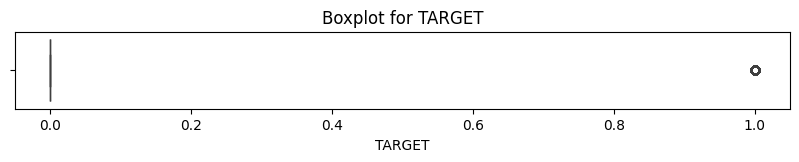

IQR for TARGET: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 24825
TARGET
FLAG_OWN_CAR
FLAG_OWN_REALTY


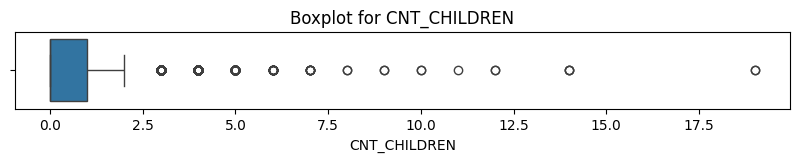

IQR for CNT_CHILDREN: 1.00
Outlier bounds: [-1.50, 2.50]
99th percentile: 3.00
Number of outliers above upper bound: 4272
CNT_CHILDREN


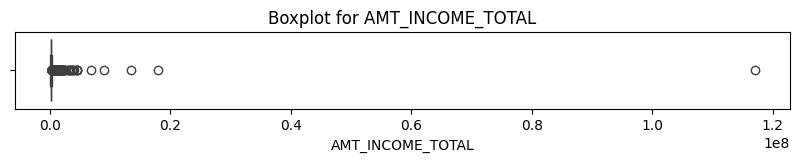

IQR for AMT_INCOME_TOTAL: 90000.00
Outlier bounds: [-22500.00, 337500.00]
99th percentile: 472500.00
Number of outliers above upper bound: 14035
AMT_INCOME_TOTAL


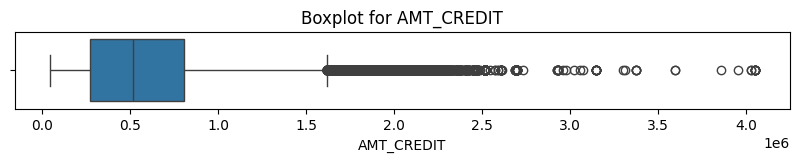

IQR for AMT_CREDIT: 538650.00
Outlier bounds: [-537975.00, 1616625.00]
99th percentile: 1854000.00
Number of outliers above upper bound: 6562
AMT_CREDIT


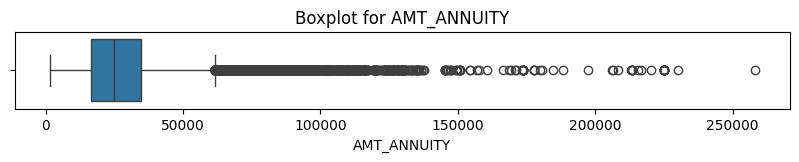

IQR for AMT_ANNUITY: 18072.00
Outlier bounds: [-10584.00, 61704.00]
99th percentile: 70006.50
Number of outliers above upper bound: 7504
AMT_ANNUITY


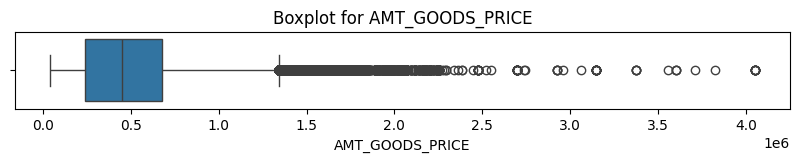

IQR for AMT_GOODS_PRICE: 441000.00
Outlier bounds: [-423000.00, 1341000.00]
99th percentile: 1800000.00
Number of outliers above upper bound: 14728
AMT_GOODS_PRICE


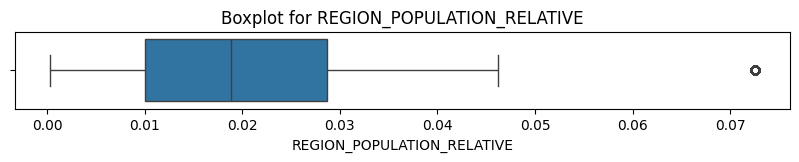

IQR for REGION_POPULATION_RELATIVE: 0.02
Outlier bounds: [-0.02, 0.06]
99th percentile: 0.07
Number of outliers above upper bound: 8412
REGION_POPULATION_RELATIVE
YEARS_BIRTH


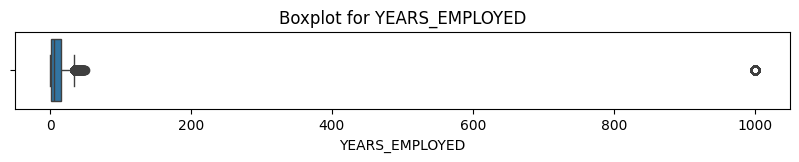

IQR for YEARS_EMPLOYED: 13.00
Outlier bounds: [-17.50, 34.50]
99th percentile: 1000.00
Number of outliers above upper bound: 56440
YEARS_EMPLOYED


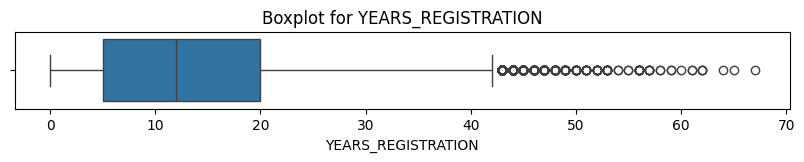

IQR for YEARS_REGISTRATION: 15.00
Outlier bounds: [-17.50, 42.50]
99th percentile: 38.00
Number of outliers above upper bound: 653
YEARS_REGISTRATION
YEARS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE


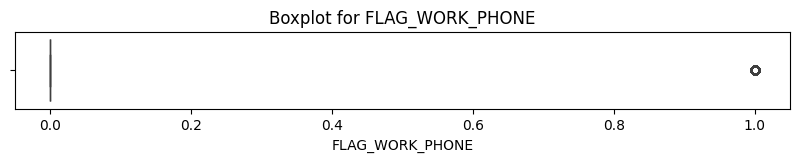

IQR for FLAG_WORK_PHONE: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 61308
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE


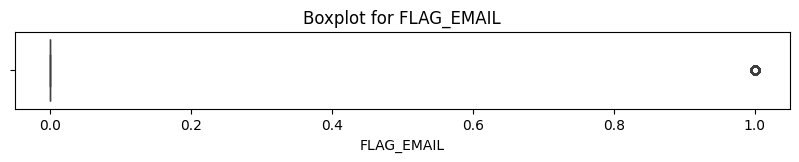

IQR for FLAG_EMAIL: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 17442
FLAG_EMAIL


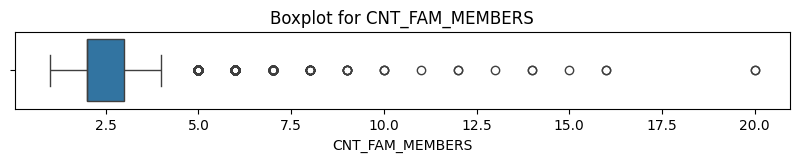

IQR for CNT_FAM_MEMBERS: 1.00
Outlier bounds: [0.50, 4.50]
99th percentile: 5.00
Number of outliers above upper bound: 4007
CNT_FAM_MEMBERS


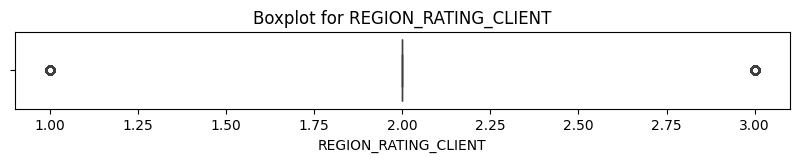

IQR for REGION_RATING_CLIENT: 0.00
Outlier bounds: [2.00, 2.00]
99th percentile: 3.00
Number of outliers above upper bound: 48330
REGION_RATING_CLIENT


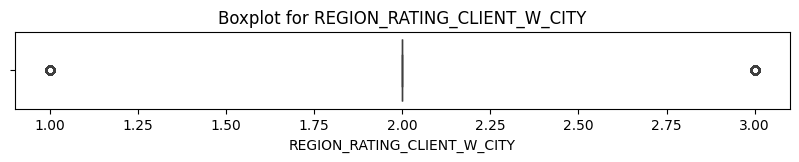

IQR for REGION_RATING_CLIENT_W_CITY: 0.00
Outlier bounds: [2.00, 2.00]
99th percentile: 3.00
Number of outliers above upper bound: 43860
REGION_RATING_CLIENT_W_CITY


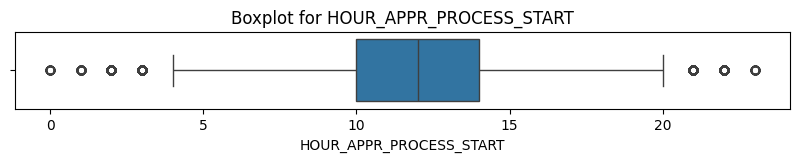

IQR for HOUR_APPR_PROCESS_START: 4.00
Outlier bounds: [4.00, 20.00]
99th percentile: 19.00
Number of outliers above upper bound: 596
HOUR_APPR_PROCESS_START


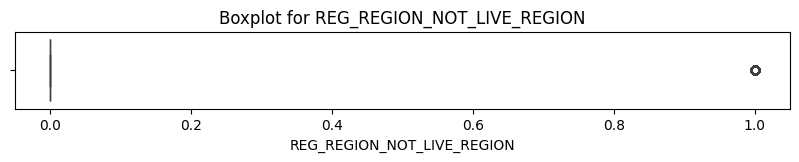

IQR for REG_REGION_NOT_LIVE_REGION: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 4657
REG_REGION_NOT_LIVE_REGION


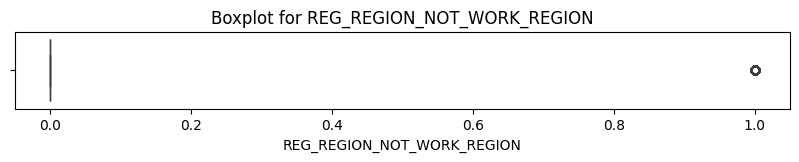

IQR for REG_REGION_NOT_WORK_REGION: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 15612
REG_REGION_NOT_WORK_REGION


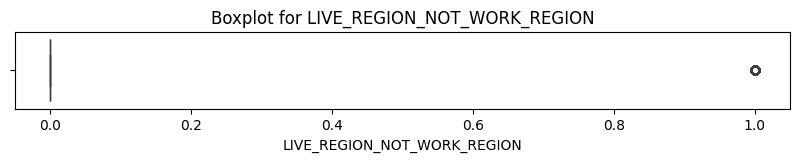

IQR for LIVE_REGION_NOT_WORK_REGION: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 12503
LIVE_REGION_NOT_WORK_REGION


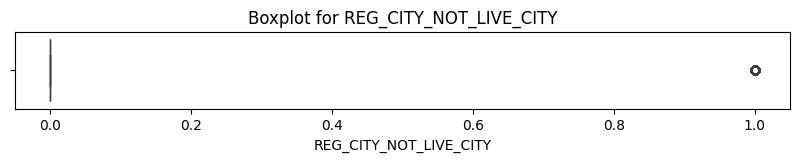

IQR for REG_CITY_NOT_LIVE_CITY: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 24039
REG_CITY_NOT_LIVE_CITY


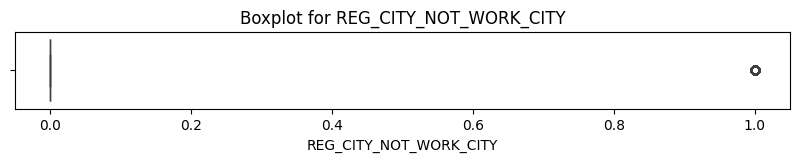

IQR for REG_CITY_NOT_WORK_CITY: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 70867
REG_CITY_NOT_WORK_CITY


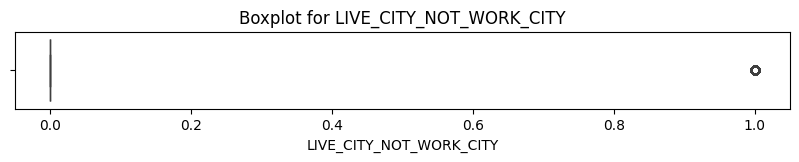

IQR for LIVE_CITY_NOT_WORK_CITY: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 55215
LIVE_CITY_NOT_WORK_CITY
EXT_SOURCE_2
EXT_SOURCE_3


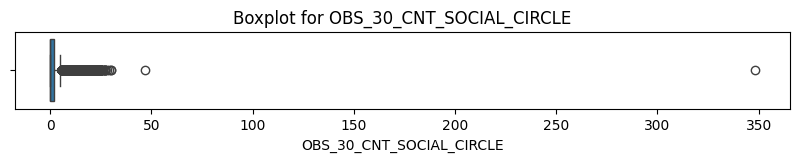

IQR for OBS_30_CNT_SOCIAL_CIRCLE: 2.00
Outlier bounds: [-3.00, 5.00]
99th percentile: 10.00
Number of outliers above upper bound: 19971
OBS_30_CNT_SOCIAL_CIRCLE


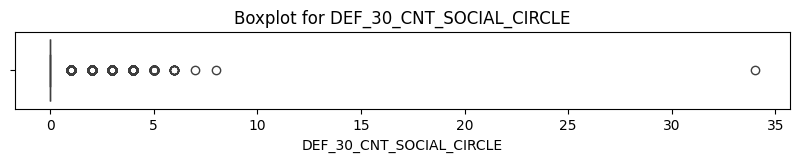

IQR for DEF_30_CNT_SOCIAL_CIRCLE: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 2.00
Number of outliers above upper bound: 35166
DEF_30_CNT_SOCIAL_CIRCLE


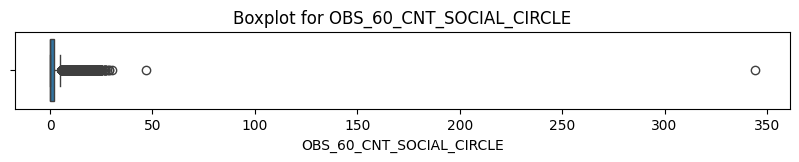

IQR for OBS_60_CNT_SOCIAL_CIRCLE: 2.00
Outlier bounds: [-3.00, 5.00]
99th percentile: 10.00
Number of outliers above upper bound: 19564
OBS_60_CNT_SOCIAL_CIRCLE


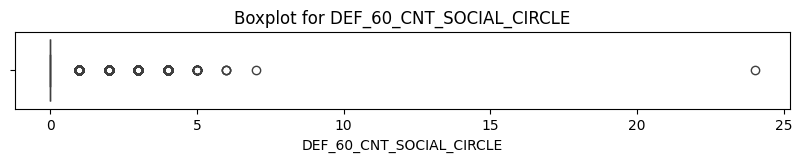

IQR for DEF_60_CNT_SOCIAL_CIRCLE: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 2.00
Number of outliers above upper bound: 25769
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE


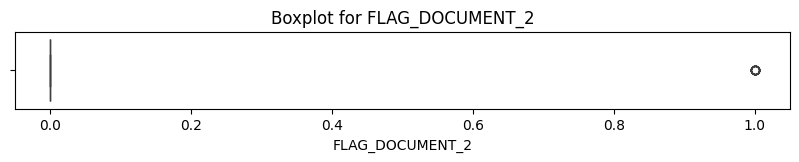

IQR for FLAG_DOCUMENT_2: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 13
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3


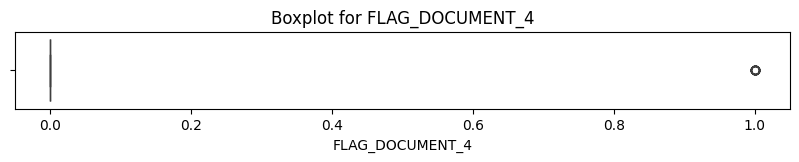

IQR for FLAG_DOCUMENT_4: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 25
FLAG_DOCUMENT_4


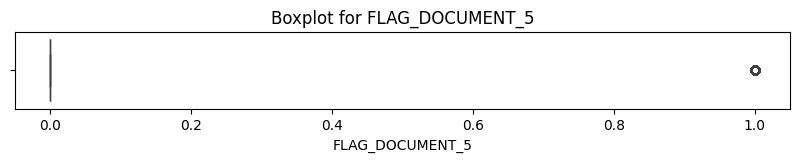

IQR for FLAG_DOCUMENT_5: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 4648
FLAG_DOCUMENT_5


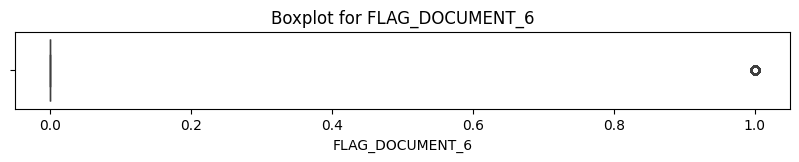

IQR for FLAG_DOCUMENT_6: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 27078
FLAG_DOCUMENT_6


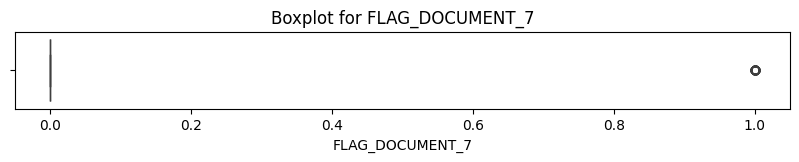

IQR for FLAG_DOCUMENT_7: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 59
FLAG_DOCUMENT_7


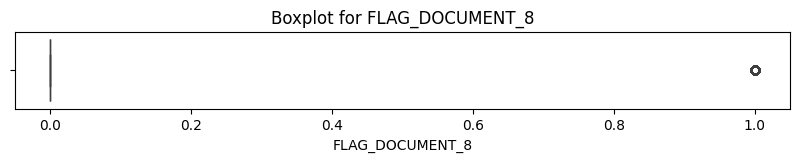

IQR for FLAG_DOCUMENT_8: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 25024
FLAG_DOCUMENT_8


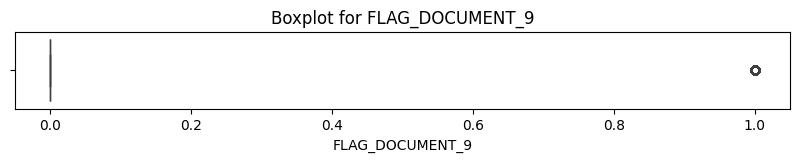

IQR for FLAG_DOCUMENT_9: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 1198
FLAG_DOCUMENT_9


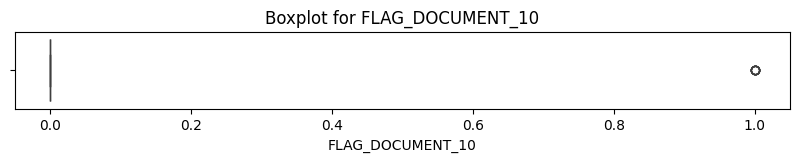

IQR for FLAG_DOCUMENT_10: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 7
FLAG_DOCUMENT_10


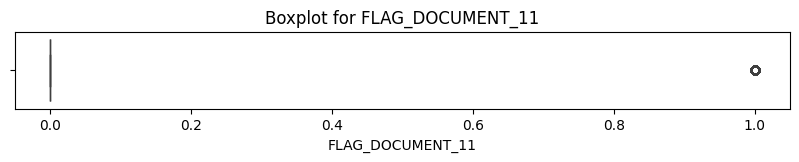

IQR for FLAG_DOCUMENT_11: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 1203
FLAG_DOCUMENT_11


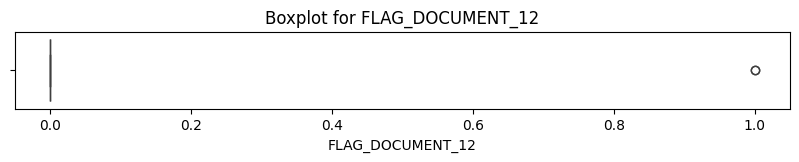

IQR for FLAG_DOCUMENT_12: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 2
FLAG_DOCUMENT_12


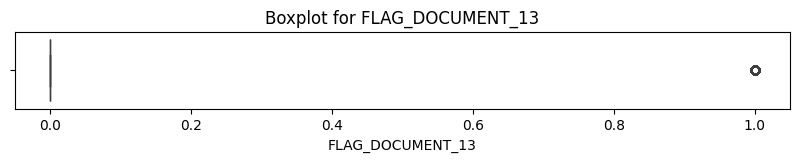

IQR for FLAG_DOCUMENT_13: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 1084
FLAG_DOCUMENT_13


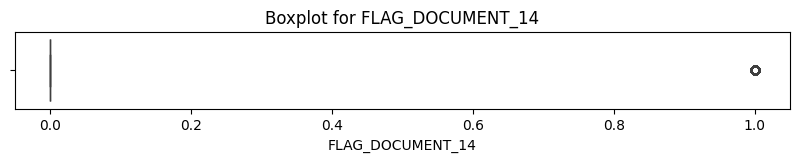

IQR for FLAG_DOCUMENT_14: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 903
FLAG_DOCUMENT_14


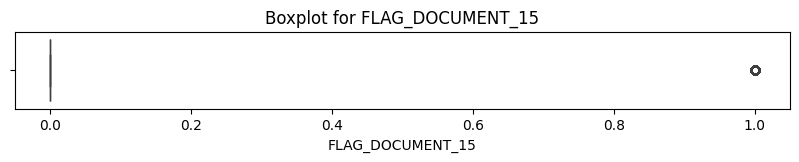

IQR for FLAG_DOCUMENT_15: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 372
FLAG_DOCUMENT_15


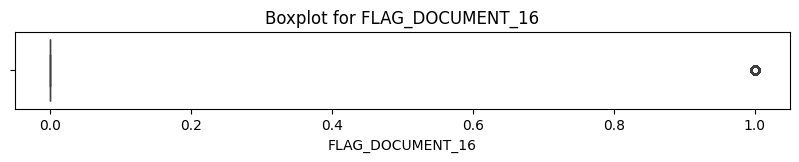

IQR for FLAG_DOCUMENT_16: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 3053
FLAG_DOCUMENT_16


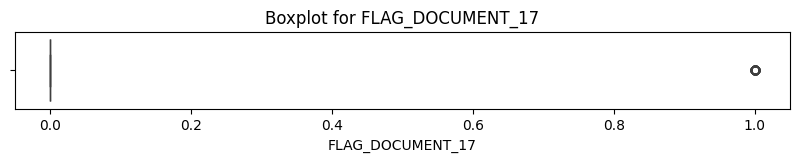

IQR for FLAG_DOCUMENT_17: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 82
FLAG_DOCUMENT_17


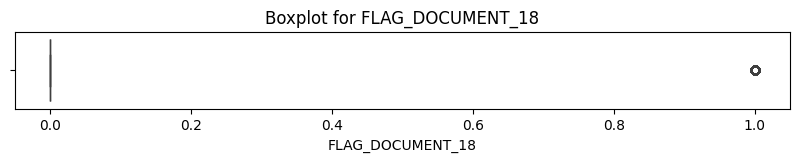

IQR for FLAG_DOCUMENT_18: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 2500
FLAG_DOCUMENT_18


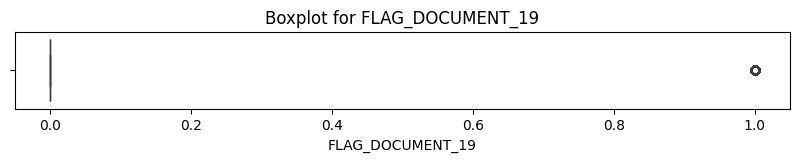

IQR for FLAG_DOCUMENT_19: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 183
FLAG_DOCUMENT_19


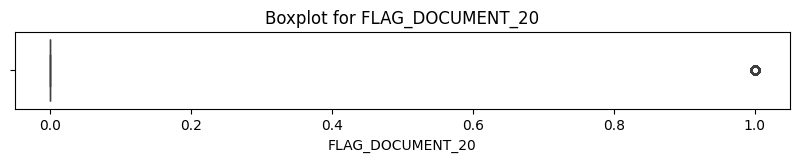

IQR for FLAG_DOCUMENT_20: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 156
FLAG_DOCUMENT_20


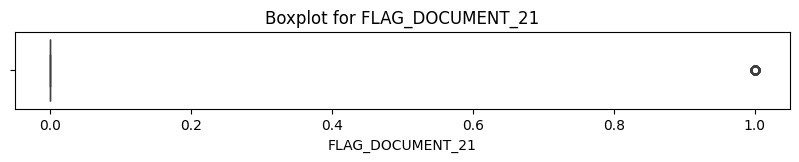

IQR for FLAG_DOCUMENT_21: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 103
FLAG_DOCUMENT_21


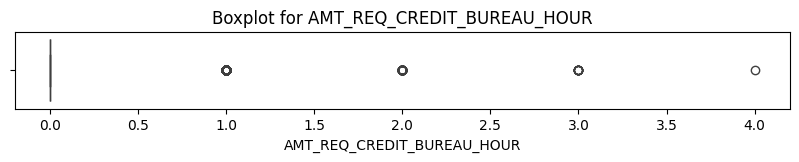

IQR for AMT_REQ_CREDIT_BUREAU_HOUR: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 1626
AMT_REQ_CREDIT_BUREAU_HOUR


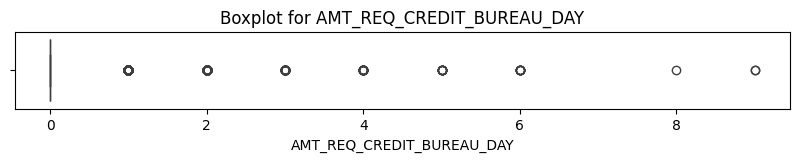

IQR for AMT_REQ_CREDIT_BUREAU_DAY: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 0.00
Number of outliers above upper bound: 1489
AMT_REQ_CREDIT_BUREAU_DAY


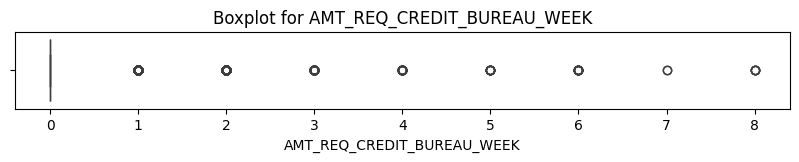

IQR for AMT_REQ_CREDIT_BUREAU_WEEK: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 1.00
Number of outliers above upper bound: 8536
AMT_REQ_CREDIT_BUREAU_WEEK


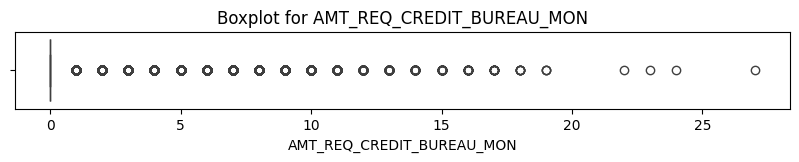

IQR for AMT_REQ_CREDIT_BUREAU_MON: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 4.00
Number of outliers above upper bound: 43759
AMT_REQ_CREDIT_BUREAU_MON


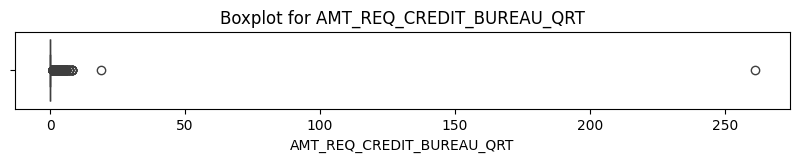

IQR for AMT_REQ_CREDIT_BUREAU_QRT: 0.00
Outlier bounds: [0.00, 0.00]
99th percentile: 2.00
Number of outliers above upper bound: 50575
AMT_REQ_CREDIT_BUREAU_QRT


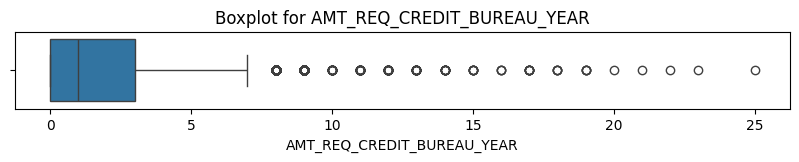

IQR for AMT_REQ_CREDIT_BUREAU_YEAR: 3.00
Outlier bounds: [-4.50, 7.50]
99th percentile: 8.00
Number of outliers above upper bound: 3364
AMT_REQ_CREDIT_BUREAU_YEAR


In [ ]:
for col in numeric_df:
  lb,ub,q = detect_outliers(df_clean,col)
  print(col)

ALL OTHER OUTLIERS ARE RELEVANT EXCEPT YEAR_EMPLOYED

In [ ]:
df_clean['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

In [ ]:
df_clean['YEARS_EMPLOYED'].replace(1000,np.nan,inplace=True)
print(df_clean['YEARS_EMPLOYED'].isna().sum())
imputer = SimpleImputer(strategy='median')
df_clean['YEARS_EMPLOYED'] = imputer.fit_transform(df_clean[['YEARS_EMPLOYED']])

55374


EDA

In [ ]:
df_clean.head(10)

TARGET NAME_CONTRACT_TYPE CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0       1         Cash loans           M             0                1   
1       0         Cash loans           F             0                0   
2       0    Revolving loans           M             1                1   
3       0         Cash loans           F             0                1   
4       0         Cash loans           M             0                1   
5       0         Cash loans           M             0                1   
6       0         Cash loans           F             1                1   
7       0         Cash loans           M             1                1   
8       0         Cash loans           F             0                1   
9       0    Revolving loans           M             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   
5             0           99000.0    490495.5      27517.5         454500.0   
6             1          171000.0   1560726.0      41301.0        1395000.0   
7             0          360000.0   1530000.0      42075.0        1530000.0   
8             0          112500.0   1019610.0      33826.5         913500.0   
9             0          135000.0    405000.0      20250.0         405000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   
5  ...                0                0                0                0   
6  ...                0                0                0                0   
7  ...                0                0                0                0   
8  ...                0                0                0                0   
9  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   
5                        0.0                        0.0   
6                        0.0                        0.0   
7                        0.0                        0.0   
8                        0.0                        0.0   
9                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   
6                         0.0                        1.0   
7                         0.0                        0.0   
8                         0.0                        0.0   
9                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                  

Dataset Imbalance

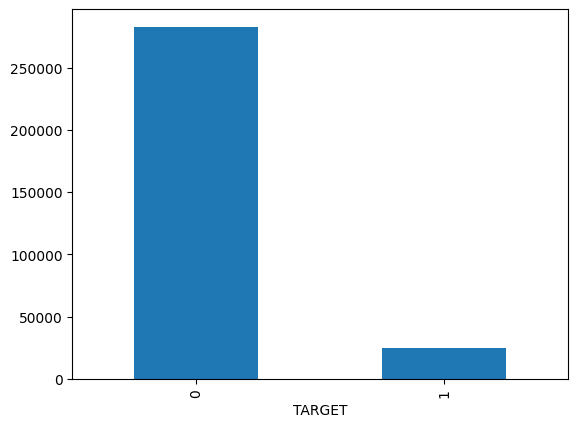

In [ ]:
df_clean['TARGET'].value_counts().plot(kind='bar')
plt.show()

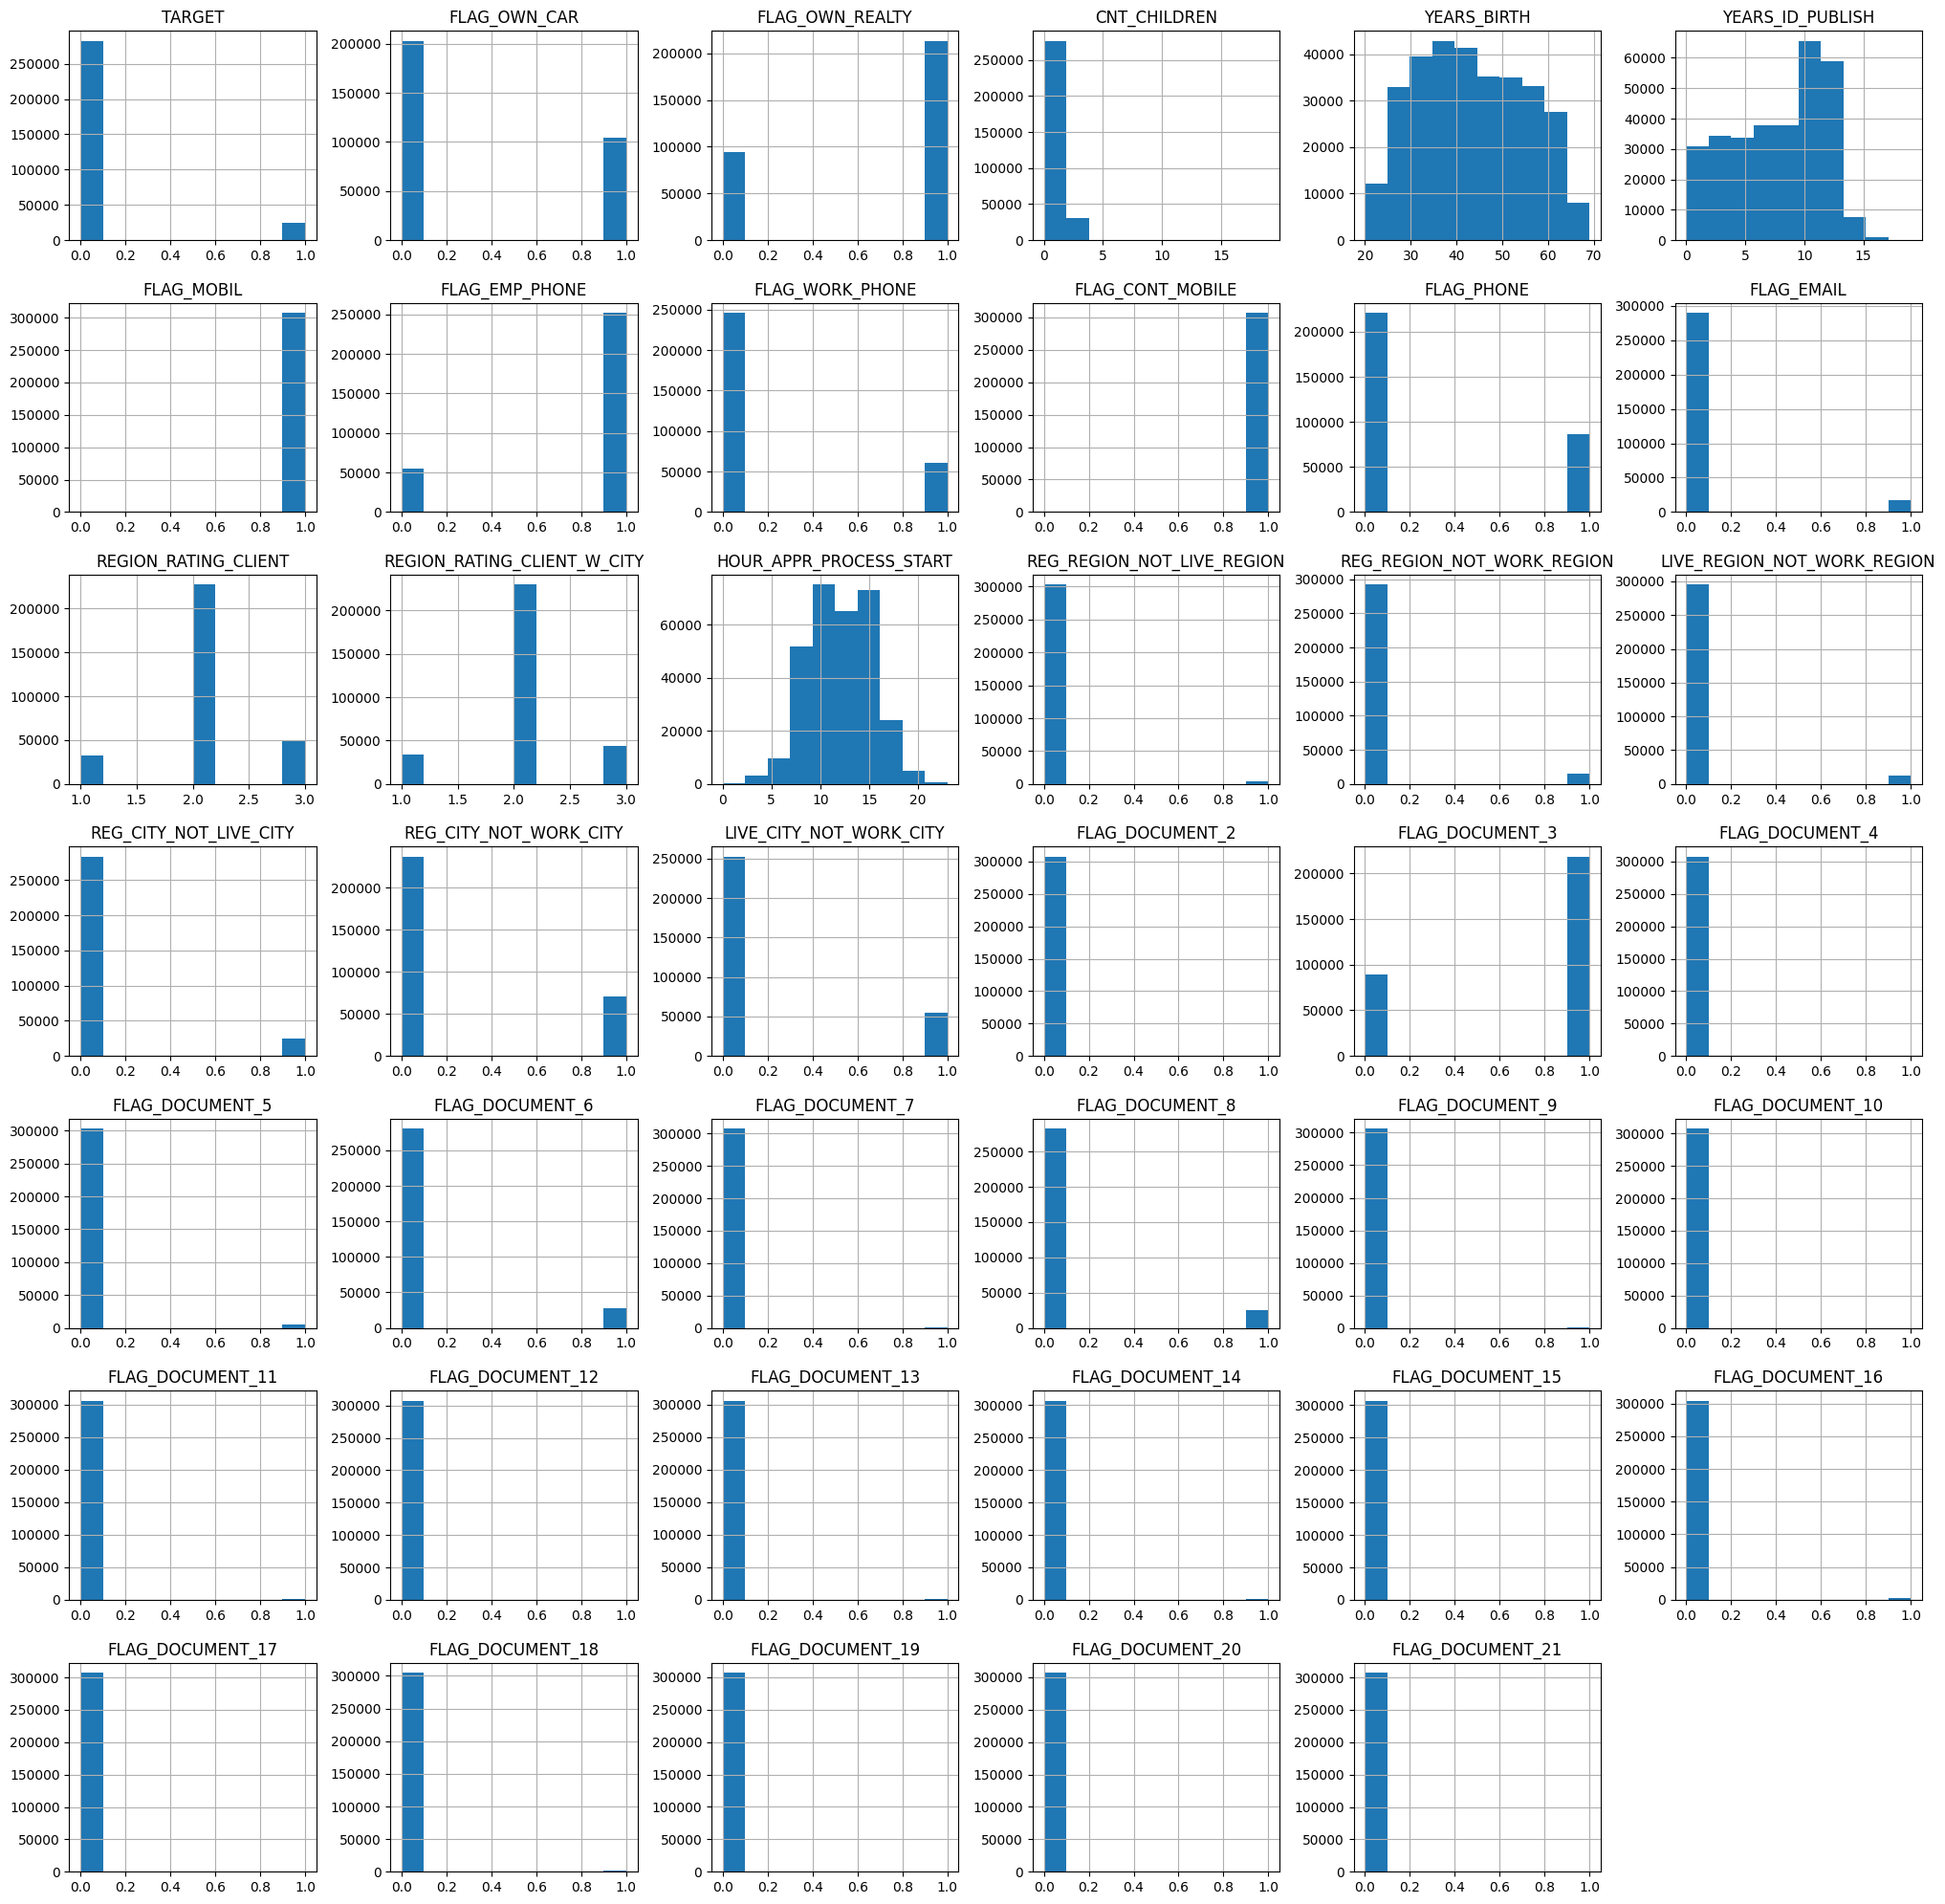

In [ ]:
df_clean.select_dtypes('int').hist(figsize=(25,25))
plt.show()

In [ ]:
numeric_df = df_clean.select_dtypes(exclude='object')
categorical_df = df_clean.select_dtypes(include='object')

In [ ]:
def plt_percentage(col , h =False):
    if (h == False):
        plt.figure(figsize=(20,4))
        plt.subplot(1,2,1)
        sns.countplot(data=df_clean , x=col)
        plt.xticks(rotation=90)
        plt.title(col)
        plt.subplot(1,2,2)
        percentage_1_in_category = df_clean.groupby(col)['TARGET'].apply(lambda x: (x == 1).sum() / len(x) ).reset_index()
        sns.barplot(x=col, y='TARGET', data=percentage_1_in_category.sort_values(by="TARGET", ascending=False))
        plt.title('Percentage of default')
        plt.xlabel(col)
        plt.xticks(rotation=90)
        plt.ylabel('Percentage')
    else:
        plt.figure(figsize=(13,10))
        plt.subplot(2,1,1)
        sns.countplot(data=df_clean , x=col)
        plt.title(col)
        plt.subplot(2,1,2)
        percentage_1_in_category = df_clean.groupby(col)['TARGET'].apply(lambda x: (x == 1).sum() / len(x) ).reset_index()
        sns.barplot(x=col, y='TARGET', data=percentage_1_in_category.sort_values(by="TARGET", ascending=False))
        plt.title('Percentage of  default')
        plt.xlabel(col)
        plt.ylabel('Percentage')
        plt.subplots_adjust(hspace=0.4)

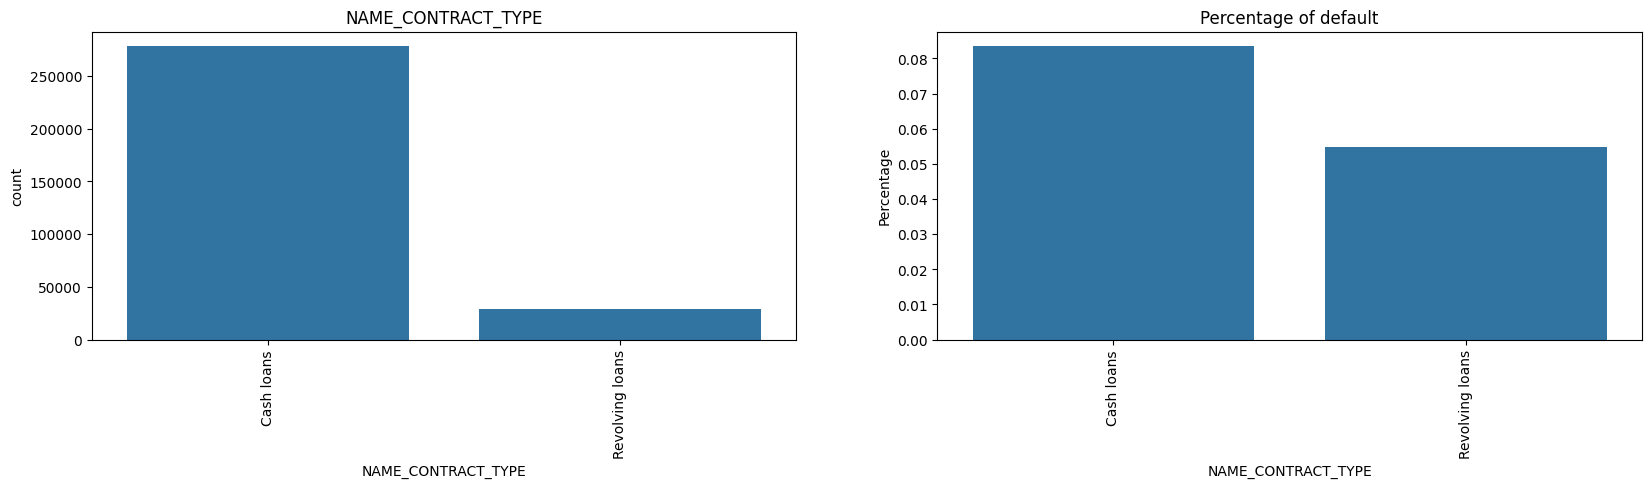

In [ ]:
plt_percentage('NAME_CONTRACT_TYPE')

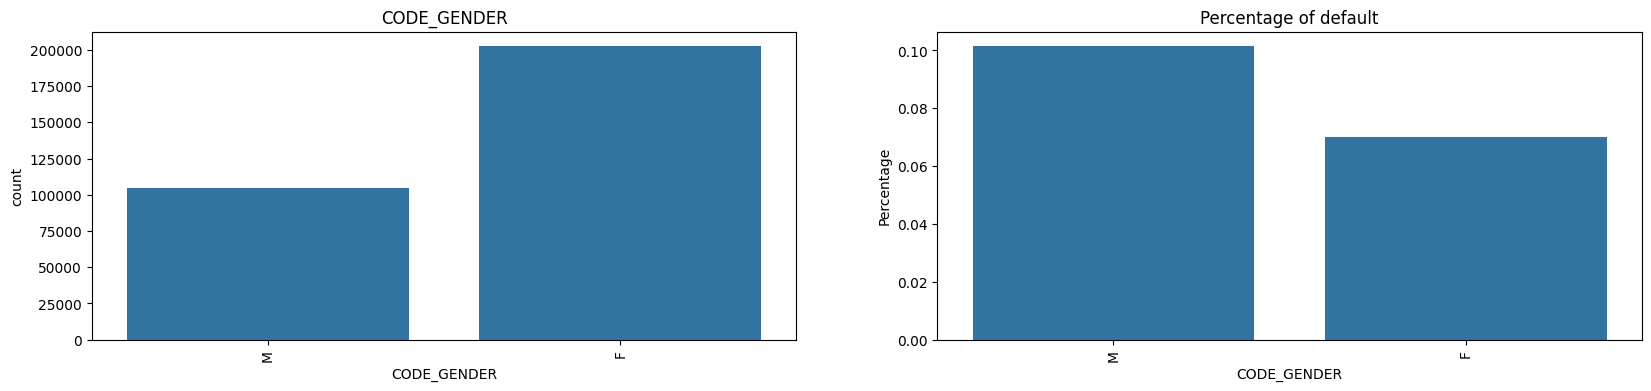

In [ ]:
plt_percentage('CODE_GENDER')

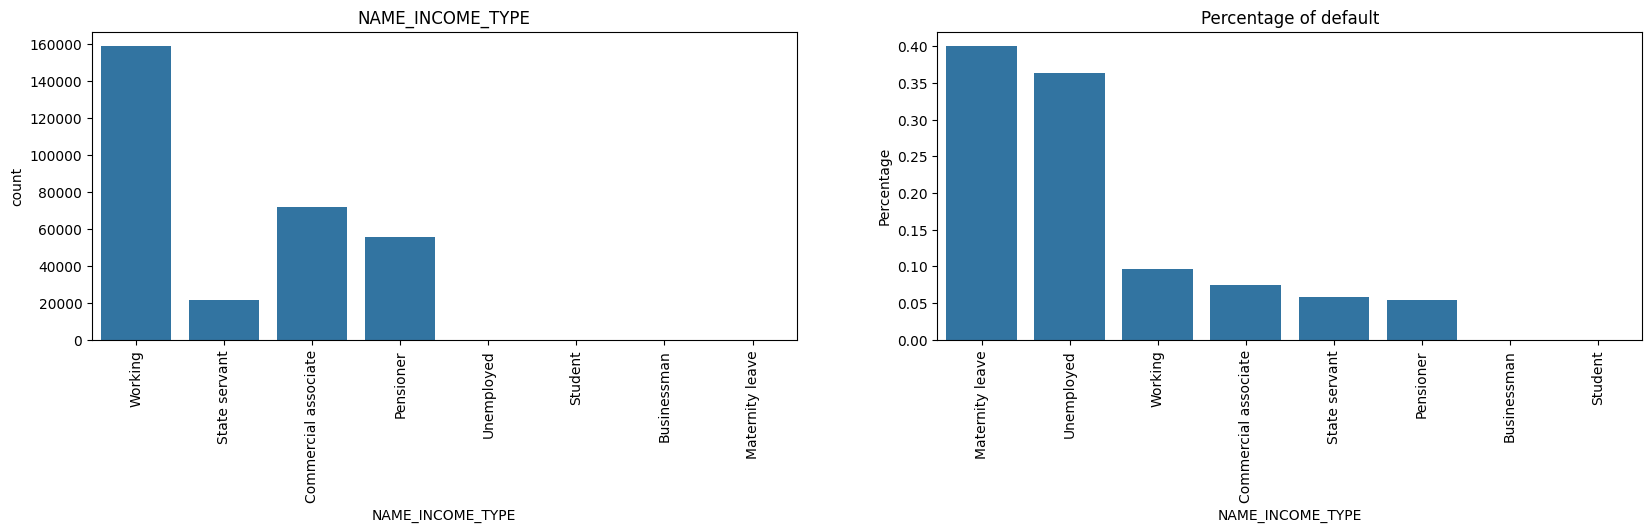

In [ ]:
plt_percentage('NAME_INCOME_TYPE')

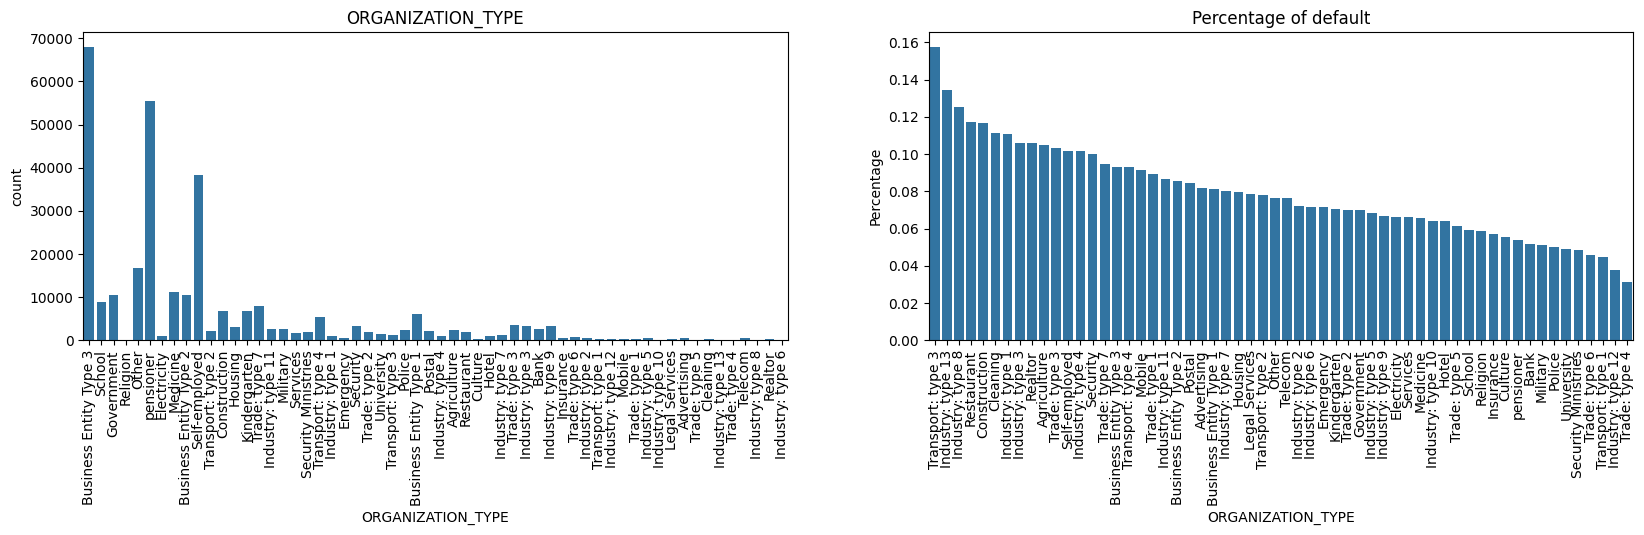

In [ ]:
plt_percentage('ORGANIZATION_TYPE')

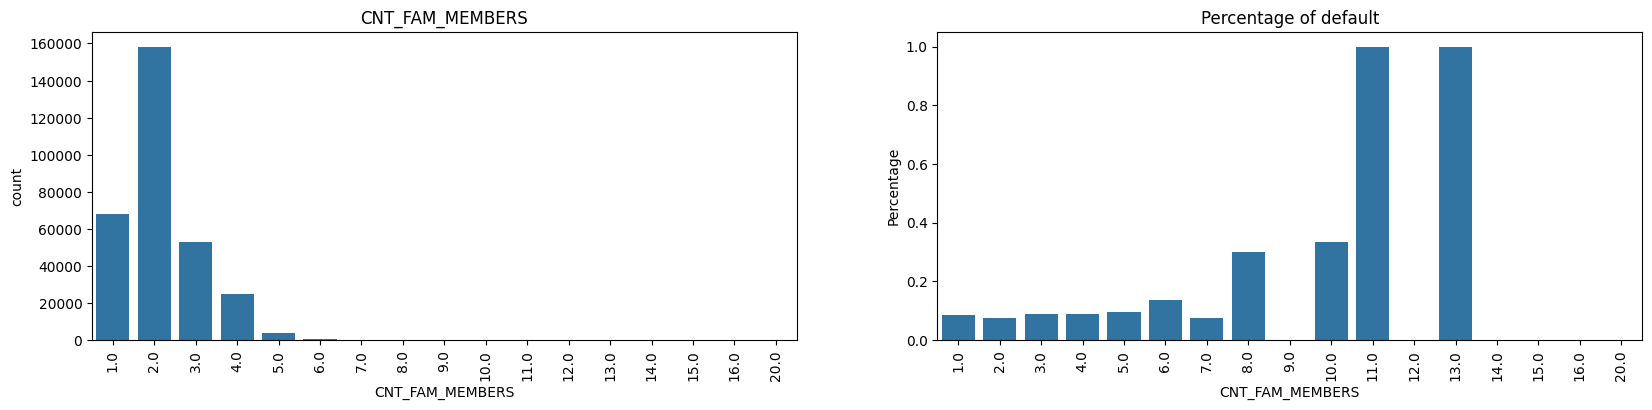

In [ ]:
plt_percentage('CNT_FAM_MEMBERS')

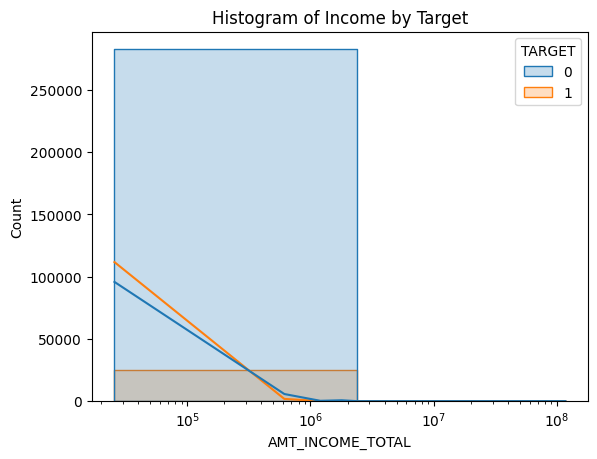

In [ ]:
sns.histplot(data=df, x='AMT_INCOME_TOTAL', hue='TARGET', bins=50, kde=True, element='step')
plt.title("Histogram of Income by Target")
plt.xscale('log')  # Optional
plt.show()


<Axes: ylabel='AMT_INCOME_TOTAL'>

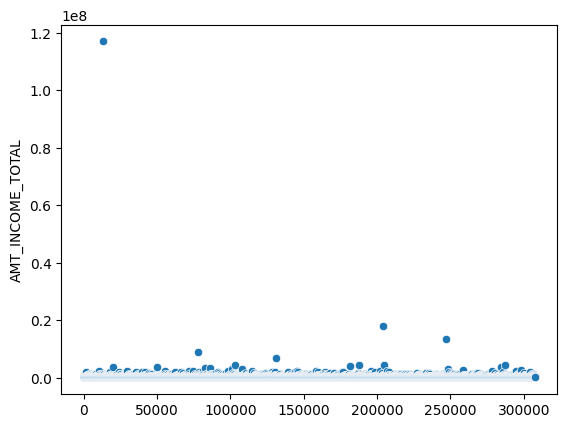

In [ ]:
sns.scatterplot(data=df_clean['AMT_INCOME_TOTAL'])

In [ ]:
df_clean.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_

In [ ]:
df_filltered = df_clean.copy()

In [ ]:
numeric_df_filltered = df_filltered.select_dtypes(exclude='object')
corrs = numeric_df_filltered.corr()
plt.figure(figsize=(120,80))
sns.heatmap(corrs,annot=True,cmap='coolwarm')

<Axes: >

In [ ]:
df_filltered['in_perF'] = df_filltered['AMT_INCOME_TOTAL']/df_filltered['CNT_FAM_MEMBERS']
df_filltered['cred_rt'] = df_filltered['AMT_CREDIT']/df_filltered['AMT_INCOME_TOTAL']
df_filltered['Emp/age'] = df_filltered['YEARS_EMPLOYED']/df_filltered['YEARS_BIRTH']
df_filltered['Ann/income'] = df_filltered['AMT_ANNUITY']/df_filltered['AMT_INCOME_TOTAL']

In [ ]:
corrs = numeric_df_filltered.corr()['TARGET'].abs()
col_toDrop = corrs[corrs < 0.04].index
len(col_toDrop)

48

In [ ]:
col_toDrop

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_

In [ ]:
df_reduced = df_filltered.drop(col_toDrop,axis=1)

In [ ]:
print(df_reduced.shape)

(307511, 28)


In [ ]:
numerical_reduced = df_reduced.select_dtypes(exclude='object')
corrs = numerical_reduced.corr()
plt.figure(figsize=(100,100))
sns.heatmap(corrs,annot=True,cmap='coolwarm')

<Axes: >

In [ ]:
def correlation(dataset, threshold) :
  col_corr = set() # Set of at L the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold: # we are interested in absolute coeff value
        colname = corr_matrix.columns[i] # getting the name of column
        col_corr.add(colname)
  return col_corr

In [ ]:
df_reduced_filltered = df_reduced.drop(correlation(numerical_reduced,0.5),axis=1)

In [ ]:
print(df_reduced_filltered.shape)

(307511, 24)


In [ ]:
df_reduced_filltered.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT', 'WEEKDAY_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_DOCUMENT_3', 'in_perF', 'cred_rt'],
      dtype='object')

In [ ]:
df_reduced_filltered['AMT_INCOME_TOTAL'] = df_filltered['AMT_INCOME_TOTAL']
df_reduced_filltered['AMT_CREDIT'] = df_filltered['AMT_CREDIT']
df_reduced_filltered['AMT_ANNUITY'] = df_filltered['AMT_ANNUITY']
df_reduced_filltered['CNT_FAM_MEMBERS'] = df_filltered['CNT_FAM_MEMBERS']
df_reduced_filltered.drop('WEEKDAY_APPR_PROCESS_START',axis=1,inplace=True)

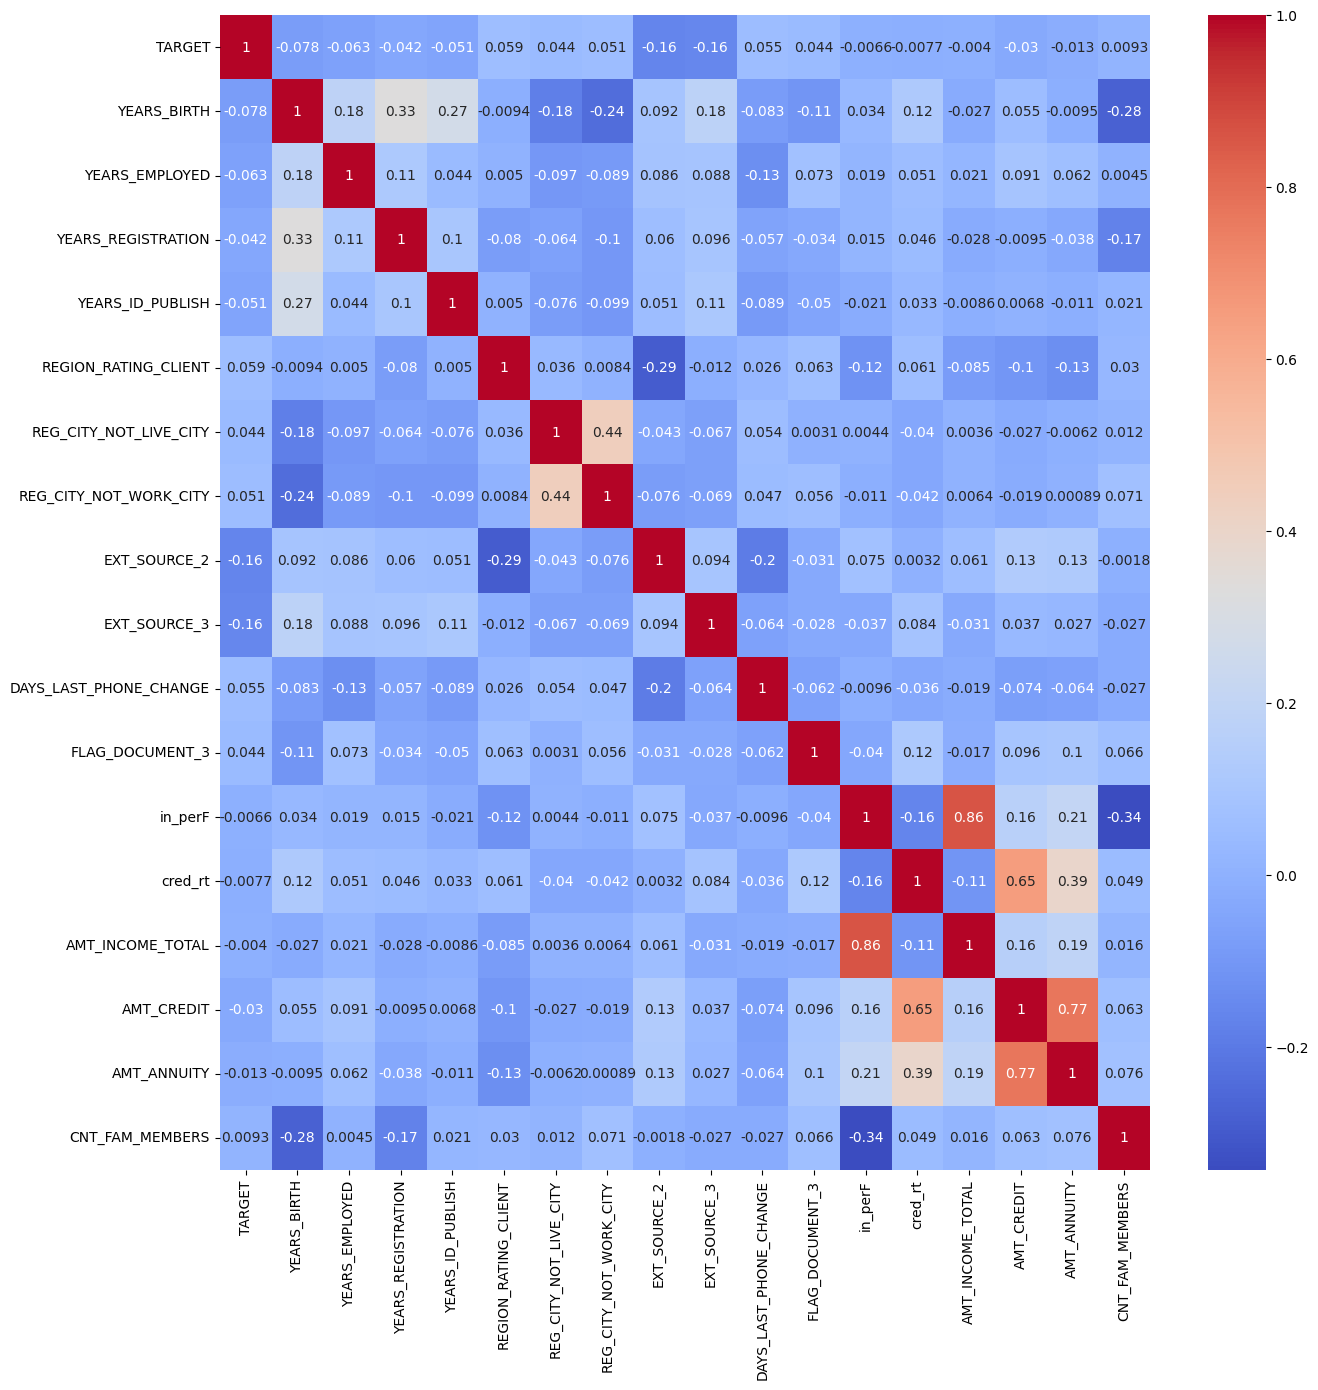

In [ ]:
nums = df_reduced_filltered.select_dtypes(exclude='object')
corrs = nums.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corrs,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
categorical_df_reduced = df_reduced_filltered.select_dtypes(include='object')
for col in categorical_df_reduced:
    print(col,": ",categorical_df_reduced[col].nunique(),"\n")

NAME_CONTRACT_TYPE :  2 

CODE_GENDER :  2 

NAME_TYPE_SUITE :  7 

NAME_INCOME_TYPE :  8 

NAME_EDUCATION_TYPE :  5 

NAME_FAMILY_STATUS :  6 

NAME_HOUSING_TYPE :  6 

OCCUPATION_TYPE :  19 

ORGANIZATION_TYPE :  58 



In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
columns = ['OCCUPATION_TYPE','ORGANIZATION_TYPE']
for col in columns:
    freq = df_reduced_filltered[col].value_counts() / len(df_reduced_filltered)
    df_reduced_filltered[col] = df_reduced_filltered[col].map(freq)
    df_reduced_filltered.drop(col, axis=1, inplace=True)

In [ ]:
columns = ['NAME_CONTRACT_TYPE','CODE_GENDER']
ohe = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(ohe.fit_transform(df_reduced_filltered[columns]))
encoded_df.columns = ohe.get_feature_names_out(columns)
df_reduced_filltered = pd.concat([df_reduced_filltered.drop(columns, axis=1), encoded_df], axis=1)

In [ ]:
columns = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE']
le = LabelEncoder()
for col in columns:
    df_reduced_filltered[col] = le.fit_transform(df_reduced_filltered[col])

In [ ]:
df_reduced_filltered.describe()

TARGET  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
count  307511.000000    307511.000000     307511.000000        307511.000000   
mean        0.080729         5.222990          4.670288             3.188273   
std         0.272419         1.772626          2.544525             1.298753   
min         0.000000         0.000000          0.000000             0.000000   
25%         0.000000         6.000000          3.000000             2.000000   
50%         0.000000         6.000000          7.000000             4.000000   
75%         0.000000         6.000000          7.000000             4.000000   
max         1.000000         6.000000          7.000000             4.000000   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE    YEARS_BIRTH  YEARS_EMPLOYED  \
count       307511.000000      307511.000000  307511.000000    307511.00000   
mean             1.472312           1.290390      43.435968         5.67020   
std              1.168884           0.951168      11.954593         5.86224   
min              0.000000           0.000000      20.000000         0.00000   
25%              1.000000           1.000000      34.000000         2.00000   
50%              1.000000           1.000000      43.000000         4.00000   
75%              2.000000           1.000000      53.000000         7.00000   
max              5.000000           5.000000      69.000000        49.00000   

       YEARS_REGISTRATION  YEARS_ID_PUBLISH  ...       in_perF        cred_rt  \
count       307511.000000     307511.000000  ...  3.075110e+05  307511.000000   
mean            13.168683          7.713474  ...  9.310634e+04       3.957570   
std              9.646841          4.134515  ...  1.013733e+05       2.689728   
min              0.000000          0.000000  ...  2.812500e+03       0.004808   
25%              5.000000          4.000000  ...  4.725000e+04       2.018667   
50%             12.000000          8.000000  ...  7.500000e+04       3.265067   
75%             20.000000         11.000000  ...  1.125000e+05       5.159880   
max             67.000000         19.000000  ...  3.900000e+07      84.736842   

       AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  CNT_FAM_MEMBERS  \
count      3.075110e+05  3.075110e+05  307511.000000    307511.000000   
mean       1.687979e+05  5.990260e+05   27108.487841         2.152664   
std        2.371231e+05  4.024908e+05   14493.461065         0.910679   
min        2.565000e+04  4.500000e+04    1615.500000         1.000000   
25%        1.125000e+05  2.700000e+05   16524.000000         2.000000   
50%        1.471500e+05  5.135310e+05   24903.000000         2.000000   
75%        2.025000e+05  8.086500e+05   34596.000000         3.000000   
max        1.170000e+08  4.050000e+06  258025.500000        20.000000   

       NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  \
count                  307511.000000                       307511.000000   
mean                        0.904787                            0.095213   
std                         0.293509                            0.293509   
min                         0.000000                            0.000000   
25%                         1.000000                            0.000000   
50%                         1.000000                            0.000000   
75%                         1.000000                            0.000000   
max                         1.000000                            1.000000   

       CODE_GENDER_F  CODE_GENDER_M  
count  307511.000000  307511.000000  
mean        0.658357       0.341643  
std         0.474261       0.474261  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       0.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000  

[8 rows x 27 columns]

In [ ]:
df_reduced_filltered['DAYS_LAST_PHONE_CHANGE'] = -1*df_reduced_filltered['DAYS_LAST_PHONE_CHANGE']//365.25
df_reduced_filltered.rename(columns={'DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE'},inplace=True)

BALANCING A DATASET

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

<Axes: xlabel='TARGET', ylabel='count'>

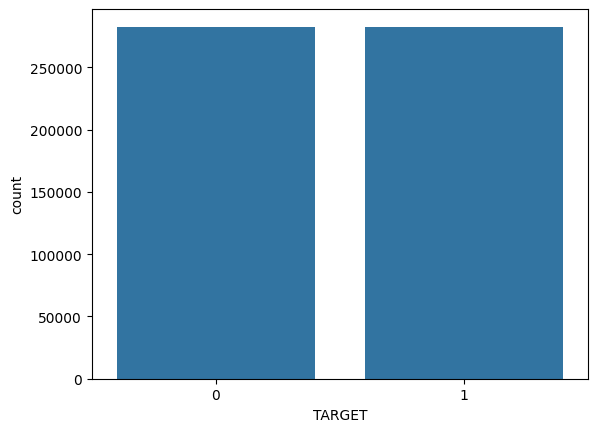

In [ ]:
df_final = df_reduced_filltered.copy()
X = df_final.drop('TARGET',axis=1)
Y = df_final['TARGET']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,Y)
sns.barplot(x=y_resampled.value_counts().index,y=y_resampled.value_counts())

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(452297, 26)
(56537, 26)
(56538, 26)


In [ ]:
#col to apply standard scaler
standard_cols = ['YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'YEARS_ID_PUBLISH', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS']
scaler = StandardScaler()

In [ ]:
X_train[standard_cols] = scaler.fit_transform(X_train[standard_cols])
X_test[standard_cols] = scaler.transform(X_test[standard_cols])
X_val[standard_cols] = scaler.transform(X_val[standard_cols])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,classification_report
import xgboost as xgb
from sklearn.decomposition import PCA

In [ ]:
!pip install xgboost

In [ ]:
model = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

In [ ]:
models = []
for name,m in model.items():
  m.fit(X_train,y_train)
  preds_train = m.predict(X_train)
  preds_val = m.predict(X_val)
  accuracy = accuracy_score(y_val,preds_val)
  print(name,": ")
  print("Train Accuracy : ",accuracy_score(y_train,preds_train))
  print("Val Accuracy : ",accuracy_score(y_val,preds_val))
  models.append((name,m))


Logistic Regression : 
Train Accuracy :  0.6911852167933902
Val Accuracy :  0.6920478262407584
Decision Tree : 
Train Accuracy :  1.0
Val Accuracy :  0.886253493225795
Random Forest : 
Train Accuracy :  0.9999911562535236
Val Accuracy :  0.9471329017651845
XGBoost : 
Train Accuracy :  0.9529623234290743
Val Accuracy :  0.9502812267855247


Choosing RandomForestClassifier first

In [ ]:
x_to_reduced_train = X_train.copy()
x_to_reduced_val = X_val.copy()

Using PCA for random forest classifier

In [ ]:
columns_reduced = ['YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'YEARS_ID_PUBLISH']
for i in range(1,2):
  pca = PCA(n_components=2)
  x_new_train = pca.fit_transform(x_to_reduced_train[columns_reduced])
  x_new_val = pca.transform(x_to_reduced_val[columns_reduced])
  x_final_train = np.concatenate([
      x_to_reduced_train.drop(columns_reduced, axis=1).values,
      x_new_train
  ], axis=1)

  x_final_val = np.concatenate([
      x_to_reduced_val.drop(columns_reduced, axis=1).values,
      x_new_val
  ], axis=1)
  print(i," : ")
  model_rf = RandomForestClassifier()
  model_rf.fit(x_final_train,y_train)
  preds_train = model_rf.predict(x_final_train)
  preds_val = model_rf.predict(x_final_val)
  print("Train Accuracy : ",accuracy_score(y_train,preds_train))
  print("Val Accuracy : ",accuracy_score(y_val,preds_val))

1  : 
Train Accuracy :  0.9999955781267619
Val Accuracy :  0.9386076621033641


PCA Doesn't Work

In [ ]:
X_train.columns

Index(['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'YEARS_BIRTH',
       'YEARS_EMPLOYED', 'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH',
       'REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'in_perF', 'cred_rt',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans',
       'CODE_GENDER_F', 'CODE_GENDER_M'],
      dtype='object')

In [ ]:
def feature_importance(data,features_imp):
  columns = data.columns
  for i,v in enumerate(features_imp):
    print('Feature: %s, Score: %.5f' % (columns[i],v))

# model_rf = models[2][1]
# importance = model_rf.feature_importances_
# feature_importance(importance)

After removing some non important features

In [ ]:
x = X_resampled.drop(['NAME_CONTRACT_TYPE_Cash loans','NAME_CONTRACT_TYPE_Revolving loans','REG_CITY_NOT_LIVE_CITY'],axis=1)
y = y_resampled

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train[standard_cols] = scaler.fit_transform(x_train[standard_cols])
x_test[standard_cols] = scaler.transform(x_test[standard_cols])
x_val[standard_cols] = scaler.transform(x_val[standard_cols])

model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
preds_train = model_rf.predict(x_train)
preds_val = model_rf.predict(x_val)
print("Train Accuracy : ",accuracy_score(y_train,preds_train))
print("Val Accuracy : ",accuracy_score(y_val,preds_val))

Train Accuracy :  0.9999933671901428
Val Accuracy :  0.945859421981676


Applying randomized Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search setup
search = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=param_dist,
    n_iter=10 ,  # Try 10 random combinations
    scoring='accuracy',
    cv = 3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit to training data
search.fit(x_train, y_train)

# Extract best parameters
best_params = search.best_params_
print("Best Hyperparameters:", best_params)

# Train best model
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(x_train, y_train)

# Predictions and accuracy
preds_train = best_model.predict(x_train)
preds_val = best_model.predict(x_val)
print("Train Accuracy : ", accuracy_score(y_train, preds_train))
print("Val Accuracy : ", accuracy_score(y_val, preds_val))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
Train Accuracy :  0.997897399275255
Val Accuracy :  0.9252184371573101


Overfitting is found. using xgboost next

In [ ]:
feature_importance(best_model.feature_importances_)

Feature: NAME_TYPE_SUITE, Score: 0.00905
Feature: NAME_INCOME_TYPE, Score: 0.01166
Feature: NAME_EDUCATION_TYPE, Score: 0.01182
Feature: NAME_FAMILY_STATUS, Score: 0.01472
Feature: NAME_HOUSING_TYPE, Score: 0.00872
Feature: YEARS_BIRTH, Score: 0.05411
Feature: YEARS_EMPLOYED, Score: 0.02963
Feature: YEARS_REGISTRATION, Score: 0.05534
Feature: YEARS_ID_PUBLISH, Score: 0.04269
Feature: REGION_RATING_CLIENT, Score: 0.01024
Feature: REG_CITY_NOT_LIVE_CITY, Score: 0.00828
Feature: REG_CITY_NOT_WORK_CITY, Score: 0.12928
Feature: EXT_SOURCE_2, Score: 0.11621
Feature: EXT_SOURCE_3, Score: 0.02826
Feature: YEARS_LAST_PHONE_CHANGE, Score: 0.00715
Feature: FLAG_DOCUMENT_3, Score: 0.05225
Feature: in_perF, Score: 0.07108
Feature: cred_rt, Score: 0.04353
Feature: AMT_INCOME_TOTAL, Score: 0.06641
Feature: AMT_CREDIT, Score: 0.07154
Feature: AMT_ANNUITY, Score: 0.01392
Feature: CNT_FAM_MEMBERS, Score: 0.00549
Feature: NAME_CONTRACT_TYPE_Cash loans, Score: 0.00531
Feature: NAME_CONTRACT_TYPE_Revolving

removing some columns from rfc which are not important

In [ ]:
x = X_resampled.drop(['NAME_CONTRACT_TYPE_Cash loans','NAME_CONTRACT_TYPE_Revolving loans','REG_CITY_NOT_LIVE_CITY','CODE_GENDER_F','CODE_GENDER_M','NAME_HOUSING_TYPE','REG_CITY_NOT_LIVE_CITY','YEARS_LAST_PHONE_CHANGE'],axis=1)
y = y_resampled

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train[standard_cols] = scaler.fit_transform(x_train[standard_cols])
x_test[standard_cols] = scaler.transform(x_test[standard_cols])
x_val[standard_cols] = scaler.transform(x_val[standard_cols])

best_model = RandomForestClassifier(n_estimators= 100, min_samples_split=10, min_samples_leaf=4, max_depth=None)
best_model.fit(x_train, y_train)
preds_train = best_model.predict(x_train)
preds_val = best_model.predict(x_val)
print("Train Accuracy : ",accuracy_score(y_train,preds_train))
print("Val Accuracy : ",accuracy_score(y_val,preds_val))

Train Accuracy :  0.9690866841920243
Val Accuracy :  0.9105911068661785


Still case of overfitting

# **Trying XGBOOST CLASSIFIER to reduce overfitting**

In [ ]:
x = X_resampled
y = y_resampled

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train[standard_cols] = scaler.fit_transform(x_train[standard_cols])
x_val[standard_cols] = scaler.transform(x_val[standard_cols])
x_test[standard_cols] = scaler.transform(x_test[standard_cols])

model_xg = xgb.XGBClassifier()
model_xg.fit(x_train,y_train)

preds_train = model_xg.predict(x_train)
preds_val = model_xg.predict(x_val)
print("Train Accuracy : ",accuracy_score(y_train,preds_train))
print("Val Accuracy : ",accuracy_score(y_val,preds_val))

Train Accuracy :  0.9529623234290743
Val Accuracy :  0.9502812267855247


In [ ]:
importance = model_xg.feature_importances_
feature_importance(x_train,importance)

Feature: NAME_TYPE_SUITE, Score: 0.02744
Feature: NAME_INCOME_TYPE, Score: 0.04327
Feature: NAME_EDUCATION_TYPE, Score: 0.02917
Feature: NAME_FAMILY_STATUS, Score: 0.01031
Feature: NAME_HOUSING_TYPE, Score: 0.00947
Feature: YEARS_BIRTH, Score: 0.00856
Feature: YEARS_EMPLOYED, Score: 0.03709
Feature: YEARS_REGISTRATION, Score: 0.01093
Feature: YEARS_ID_PUBLISH, Score: 0.01707
Feature: REGION_RATING_CLIENT, Score: 0.02282
Feature: REG_CITY_NOT_LIVE_CITY, Score: 0.00354
Feature: REG_CITY_NOT_WORK_CITY, Score: 0.03735
Feature: EXT_SOURCE_2, Score: 0.02137
Feature: EXT_SOURCE_3, Score: 0.03291
Feature: YEARS_LAST_PHONE_CHANGE, Score: 0.10685
Feature: FLAG_DOCUMENT_3, Score: 0.00380
Feature: in_perF, Score: 0.00112
Feature: cred_rt, Score: 0.00157
Feature: AMT_INCOME_TOTAL, Score: 0.00169
Feature: AMT_CREDIT, Score: 0.00211
Feature: AMT_ANNUITY, Score: 0.00161
Feature: CNT_FAM_MEMBERS, Score: 0.00319
Feature: NAME_CONTRACT_TYPE_Cash loans, Score: 0.01543
Feature: NAME_CONTRACT_TYPE_Revolving

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist = {
    'n_estimators': [50, 100, 200, 400,800],
    'max_depth': [None, 10, 15],
    'learning_rate': [0.01, 0.02,0.03],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0.8, 0.9, 1.0]
}

search_rnd = RandomizedSearchCV(
    estimator=model_xg,
    param_distributions=param_dist,
    n_iter=10 ,  # Try 10 random combinations
    scoring='accuracy',
    cv = 3,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

search_rnd.fit(x_train, y_train,verbose = 2)

# Extract best parameters
best_params = search_rnd.best_params_
print("Best Hyperparameters:", best_params)

best_model = xgb.XGBClassifier(**best_params, random_state=42)
best_model.fit(x_train, y_train)

preds_train = best_model.predict(x_train)
preds_val = best_model.predict(x_val)
print("Train Accuracy : ", accuracy_score(y_train, preds_train))
print("Val Accuracy : ", accuracy_score(y_val, preds_val))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0, 'n_estimators': 800, 'max_depth': 15, 'learning_rate': 0.03, 'gamma': 0.2, 'colsample_bytree': 0.9}
Train Accuracy :  0.9979615164372083
Val Accuracy :  0.9553220842619123


In [ ]:
importance = best_model.feature_importances_
feature_importance(x_train,importance)

Feature: NAME_TYPE_SUITE, Score: 0.01014
Feature: NAME_INCOME_TYPE, Score: 0.01740
Feature: NAME_EDUCATION_TYPE, Score: 0.01582
Feature: NAME_FAMILY_STATUS, Score: 0.00514
Feature: NAME_HOUSING_TYPE, Score: 0.00565
Feature: YEARS_BIRTH, Score: 0.00449
Feature: YEARS_EMPLOYED, Score: 0.02038
Feature: YEARS_REGISTRATION, Score: 0.00464
Feature: YEARS_ID_PUBLISH, Score: 0.00682
Feature: REGION_RATING_CLIENT, Score: 0.01381
Feature: REG_CITY_NOT_LIVE_CITY, Score: 0.00446
Feature: REG_CITY_NOT_WORK_CITY, Score: 0.01515
Feature: EXT_SOURCE_2, Score: 0.00948
Feature: EXT_SOURCE_3, Score: 0.01615
Feature: YEARS_LAST_PHONE_CHANGE, Score: 0.05219
Feature: FLAG_DOCUMENT_3, Score: 0.00411
Feature: in_perF, Score: 0.00333
Feature: cred_rt, Score: 0.00342
Feature: AMT_INCOME_TOTAL, Score: 0.00359
Feature: AMT_CREDIT, Score: 0.00372
Feature: AMT_ANNUITY, Score: 0.00335
Feature: CNT_FAM_MEMBERS, Score: 0.00396
Feature: NAME_CONTRACT_TYPE_Cash loans, Score: 0.01286
Feature: NAME_CONTRACT_TYPE_Revolving

In [ ]:
# Create new engineered features
X_resampled['debt_income_ratio'] = X_resampled['AMT_CREDIT'] / X_resampled['AMT_INCOME_TOTAL']
X_resampled['annuity_income_ratio'] = X_resampled['AMT_ANNUITY'] / X_resampled['AMT_INCOME_TOTAL']
X_resampled['external_score_mean'] = X_resampled[['EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
X_resampled['family_load'] = X_resampled['CNT_FAM_MEMBERS'] / X_resampled['AMT_INCOME_TOTAL']
X_resampled['mobility'] = X_resampled['REG_CITY_NOT_LIVE_CITY'] + X_resampled['REG_CITY_NOT_WORK_CITY']

# Optional: Fix inf or NaNs
X_resampled.replace([np.inf, -np.inf], np.nan, inplace=True)
X_resampled.fillna(0, inplace=True)


In [ ]:
standard_cols = ['YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'YEARS_ID_PUBLISH',
       'YEARS_LAST_PHONE_CHANGE']

In [ ]:
x = X_resampled.drop(['CODE_GENDER_F','CODE_GENDER_M','FLAG_DOCUMENT_3','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY','AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','EXT_SOURCE_2','EXT_SOURCE_3','CNT_FAM_MEMBERS'],axis=1)
y = y_resampled

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

x_train[standard_cols] = scaler.fit_transform(x_train[standard_cols])
x_val[standard_cols] = scaler.transform(x_val[standard_cols])
x_test[standard_cols] = scaler.transform(x_test[standard_cols])

model_xg = xgb.XGBClassifier()
model_xg.fit(x_train,y_train)

preds_train = model_xg.predict(x_train)
preds_val = model_xg.predict(x_val)
print("Train Accuracy : ",accuracy_score(y_train,preds_train))
print("Val Accuracy : ",accuracy_score(y_val,preds_val))

Train Accuracy :  0.9511979960070485
Val Accuracy :  0.9486186281792777


In [ ]:
importance  = model_xg.feature_importances_
feature_importance(x_train,importance)

Feature: NAME_TYPE_SUITE, Score: 0.05486
Feature: NAME_INCOME_TYPE, Score: 0.08535
Feature: NAME_EDUCATION_TYPE, Score: 0.06632
Feature: NAME_FAMILY_STATUS, Score: 0.01556
Feature: NAME_HOUSING_TYPE, Score: 0.01613
Feature: YEARS_BIRTH, Score: 0.01702
Feature: YEARS_EMPLOYED, Score: 0.09378
Feature: YEARS_REGISTRATION, Score: 0.02644
Feature: YEARS_ID_PUBLISH, Score: 0.03230
Feature: REGION_RATING_CLIENT, Score: 0.04203
Feature: YEARS_LAST_PHONE_CHANGE, Score: 0.20821
Feature: in_perF, Score: 0.00216
Feature: cred_rt, Score: 0.00261
Feature: NAME_CONTRACT_TYPE_Cash loans, Score: 0.02345
Feature: NAME_CONTRACT_TYPE_Revolving loans, Score: 0.19682
Feature: debt_income_ratio, Score: 0.00392
Feature: annuity_income_ratio, Score: 0.00244
Feature: external_score_mean, Score: 0.06747
Feature: family_load, Score: 0.00266
Feature: mobility, Score: 0.04048


In [ ]:
model_xgb = xgb.XGBClassifier(n_estimators=800,          # More trees for better learning
    learning_rate=0.03,        # Slightly faster learning
    max_depth=10,              # Bit deeper trees
    subsample=0.9,             # More data per tree
    colsample_bytree=0.9,      # More features per tree
    min_child_weight=1,
    gamma=0.1,                 # Loosen split condition a bit
    reg_alpha=0.1,             # Reduce regularization slightly
    reg_lambda=0.8,
    random_state=42,
    n_jobs=-1,
    verbosity=1)
model_xgb.fit(x_train,y_train)
preds_train = model_xgb.predict(x_train)
preds_val = model_xgb.predict(x_val)
print("Train Accuracy : ",accuracy_score(y_train,preds_train))
print("Val Accuracy : ",accuracy_score(y_val,preds_val))

Train Accuracy :  0.9602937892579434
Val Accuracy :  0.9514662704729563


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Test Accuracy :  0.9523851636981092


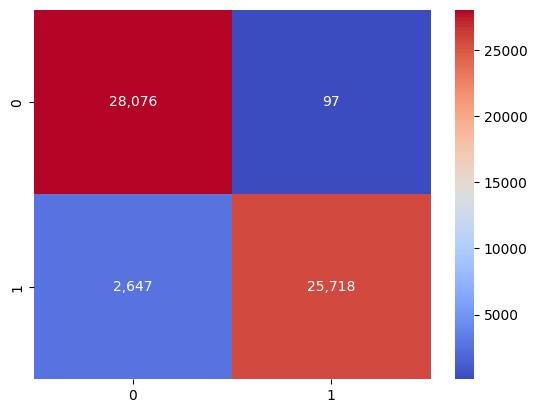

In [ ]:
preds_test = model_xgb.predict(x_test)
print("Test Accuracy : ",accuracy_score(y_test,preds_test))
matrix = confusion_matrix(y_val,preds_val)
sns.heatmap(matrix,annot=True,fmt=',',cmap='coolwarm')
plt.show()

In [ ]:
print("F1 Score is : ",f1_score(y_test,preds_test))
print("Classification Report : ")
print(classification_report(y_test,preds_test))

F1 Score is :  0.9500074283167435
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.95     28363
           1       1.00      0.91      0.95     28174

    accuracy                           0.95     56537
   macro avg       0.96      0.95      0.95     56537
weighted avg       0.96      0.95      0.95     56537



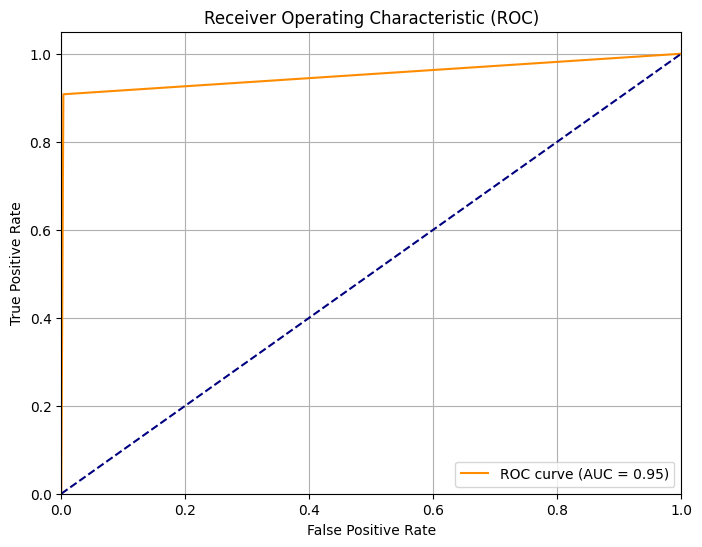

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, preds_test)

# Calculate AUC score
roc_auc = roc_auc_score(y_test, preds_test)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
x_train.columns.shape

(20,)